Generar una serie temporal de datos de temperatura.
Ajustar un modelo SARIMA a los datos generados.
Detectar anomalías utilizando la regla de 2-sigma (es decir, identificar los puntos de datos que se desvían más de dos desviaciones estándar de la media).


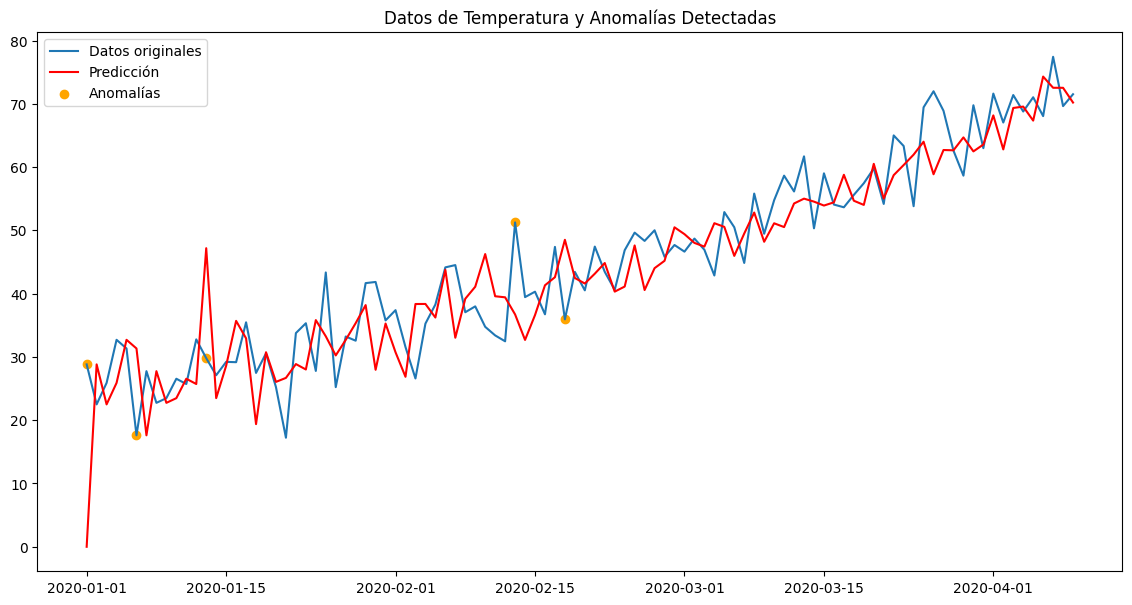

In [2]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Generar datos artificiales de temperatura
np.random.seed(0)
data = 20 + 0.5 * np.arange(100) + np.random.normal(scale=5, size=100)  # Tendencia creciente con ruido

# Convertir a Series de Pandas
times = pd.date_range(start='2020-01-01', periods=100, freq='D')
temperature_series = pd.Series(data, index=times)

# Ajustar modelo SARIMA
model = SARIMAX(temperature_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit(disp=False)

# Predecir valores y calcular residuos
temperature_series_pred = results.get_prediction(start=times[0], end=times[-1])
predicted_means = temperature_series_pred.predicted_mean
residuals = temperature_series - predicted_means

# Detectar anomalías por la regla de 2-sigma
std_dev = np.std(residuals)
mean_resid = np.mean(residuals)
anomalies = temperature_series[(residuals < mean_resid - 0.5 * std_dev) | (residuals > mean_resid + 0.5 * std_dev)]

# Visualización
plt.figure(figsize=(14, 7))
plt.plot(temperature_series, label='Datos originales')
plt.plot(predicted_means, label='Predicción', color='red')
plt.scatter(anomalies.index, anomalies, color='orange', label='Anomalías')
plt.title('Datos de Temperatura y Anomalías Detectadas')
plt.legend()
plt.show()
